In [1]:
import numpy as np
import sys
sys.path.append('./../../designer/script/')
from design import Design
from film import FilmSimple
from spectrum import Spectrum


def make_reflection_design(init_film: FilmSimple):
    inc_ang = 0.
    wls = np.linspace(400, 1000, 500) # when wls = 50, ~100 min
    target_spec = [Spectrum(inc_ang, wls, np.ones(wls.shape[0], dtype='float'))]
    
    design = Design(target_spec, init_film)
    return design

result_d_ls = []
for run_num, init_ot in enumerate(np.linspace(0, 5000, 200)):
    
    d_init = np.array([init_ot], dtype='float')
    film = FilmSimple('SiO2', 'TiO2', 'SiO2', d_init)
    design = make_reflection_design(film)
    try:
        design.TFNN_train(epoch=50)
    except Exception as e:
        print(e.args[0])

    np.savetxt(
        f'./raw_result/single_inc/0_inc-400to1000wls-init_single_layer_SiO2/{run_num}_final', 
        design.film.get_d() / 1000 # in \mu m
    )



KeyboardInterrupt: 

C:\Users\rfeng6\AppData\Local\Temp\ipykernel_13436\3791610427.py:4: UserWarning: loadtxt: input contained no data: "./raw_result/single_inc/0_inc-400to1000wls-init_single_layer_SiO2/0_final"
  d = np.loadtxt(f'./raw_result/single_inc/0_inc-400to1000wls-init_single_layer_SiO2/{run_num}_final') * 1000.


(0.0, 1.0)

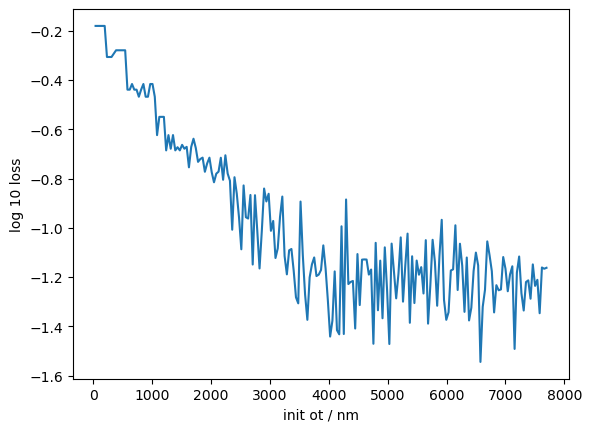

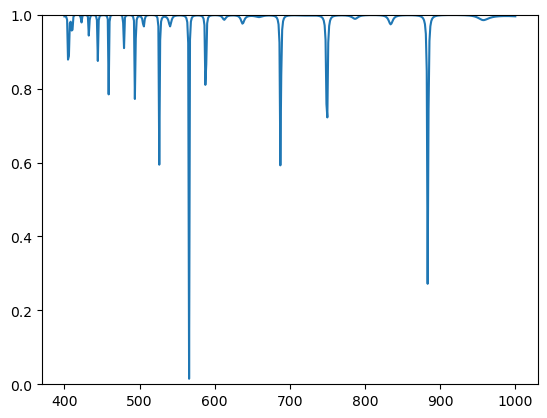

In [16]:
import matplotlib.pyplot as plt
design_ls: list[Design] = []
for run_num, init_gt in enumerate(np.linspace(0, 5000, 200)):
    d = np.loadtxt(f'./raw_result/single_inc/0_inc-400to1000wls-init_single_layer_SiO2/{run_num}_final') * 1000.
    if d.shape == (0, ):
        continue
    f = FilmSimple('SiO2', 'TiO2', 'SiO2', d)
    
    inc_ang = 0.
    wls = np.linspace(400, 1000, 500)
    target_spec = [Spectrum(inc_ang, wls, np.ones(wls.shape[0], dtype='float'))]
    
    design_ls.append(Design(target_spec, FilmSimple('SiO2', 'TiO2', 'SiO2', np.array([init_gt])), f))

init_ot, loss = [], []
for d in design_ls:
    init_ot.append(d.get_init_ot())
    loss.append(d.calculate_loss())
fig, ax = plt.subplots(1, 1)
ax.plot(init_ot, np.log10(loss))
ax.set_xlabel('init ot / nm')
ax.set_ylabel('log 10 loss')


fig, ax = plt.subplots(1, 1)
ax.plot(wls, design_ls[198].film.get_spec().get_R())
ax.set_ylim(0, 1)